In [2]:
import geopandas as gpd
import rasterio as rs
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster



In [6]:
# Create a map
m_1 = folium.Map(location=[42.0368103435097, -93.6509758555957], tiles='openstreetmap', zoom_start=15)

# Display the map
m_1

In [2]:
import pandas as pd

df = pd.read_csv('data/reprojected_IA_FullState.csv')

In [8]:
df.head()

,lat,lon,geometry
0,42.03681,-93.651000,POINT (42.0368102066532 -93.6510000170253)
1,42.03681,-93.650988,POINT (42.0368102750821 -93.6509879363105)
2,42.03681,-93.650976,POINT (42.0368103435097 -93.6509758555957)
3,42.03681,-93.650964,POINT (42.0368104119361 -93.6509637748809)
4,42.03681,-93.650952,POINT (42.0368104803611 -93.650951694166)


In [9]:
df.shape
sample_df = df.sample(1000)

In [11]:
# Add points to the map
for idx, row in sample_df.iterrows():
    Marker([row['lat'], row['lon']]).add_to(m_1)

m_1

In [12]:
import math
# Create the map
m_3 = folium.Map(location=[42.0368103435097, -93.6509758555957], tiles='cartodbpositron', zoom_start=13)

# Add points to the map
mc = MarkerCluster()
for idx, row in sample_df.iterrows():
    if not math.isnan(row['lon']) and not math.isnan(row['lat']):
        mc.add_child(Marker([row['lat'], row['lon']]))
m_3.add_child(mc)

# Display the map
m_3

In [13]:
# Create a base map
m_5 = folium.Map(location=[42.0368103435097, -93.6509758555957], tiles='cartodbpositron', zoom_start=12)

# Add a heatmap to the base map
HeatMap(data=sample_df[['lat', 'lon']], radius=10).add_to(m_5)

# Display the map
m_5

In [67]:
# Convert the DataFrame to a GeoDataFrame
rasters = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lat, df.lon))

# Set the coordinate reference system (CRS) to EPSG 4326
# rasters.crs = {'init': 'epsg:4326'}

# View the first five rows of the GeoDataFrame
rasters.head()

,lat,lon,geometry
0,42.03681,-93.651000,POINT (42.037 -93.651)
1,42.03681,-93.650988,POINT (42.037 -93.651)
2,42.03681,-93.650976,POINT (42.037 -93.651)
3,42.03681,-93.650964,POINT (42.037 -93.651)
4,42.03681,-93.650952,POINT (42.037 -93.651)


In [69]:
rasters = rasters.set_crs(4326, allow_override=True)

In [70]:
rasters.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [3]:
iowa = gpd.read_file('../shp/iowa.shp')
iowa.crs

In [4]:
iowa.head()

,elevation,geometry
0,288.0,"POLYGON ((446116.391 4654068.193, 446118.391 4..."
1,282.0,"POLYGON ((446122.391 4654068.193, 446123.391 4..."
2,286.0,"POLYGON ((446123.391 4654068.193, 446124.391 4..."
3,282.0,"POLYGON ((446124.391 4654068.193, 446125.391 4..."
4,287.0,"POLYGON ((446125.391 4654068.193, 446127.391 4..."


In [5]:
iowa['points'] = iowa['geometry'].centroid
iowa.head()

,elevation,geometry,points
0,288.0,"POLYGON ((446116.391 4654068.193, 446118.391 4...",POINT (446117.391 4654067.693)
1,282.0,"POLYGON ((446122.391 4654068.193, 446123.391 4...",POINT (446122.891 4654067.693)
2,286.0,"POLYGON ((446123.391 4654068.193, 446124.391 4...",POINT (446123.891 4654067.693)
3,282.0,"POLYGON ((446124.391 4654068.193, 446125.391 4...",POINT (446124.891 4654067.693)
4,287.0,"POLYGON ((446125.391 4654068.193, 446127.391 4...",POINT (446126.558 4654067.359)


In [6]:
iowa = iowa.set_crs(3857, allow_override=True)

In [7]:
iowa.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
iowa['area'] = iowa['geometry'].area
iowa.head()

,elevation,geometry,points,area
0,288.0,"POLYGON ((446116.391 4654068.193, 446118.391 4...",POINT (446117.391 4654067.693),2.0
1,282.0,"POLYGON ((446122.391 4654068.193, 446123.391 4...",POINT (446122.891 4654067.693),1.0
2,286.0,"POLYGON ((446123.391 4654068.193, 446124.391 4...",POINT (446123.891 4654067.693),1.0
3,282.0,"POLYGON ((446124.391 4654068.193, 446125.391 4...",POINT (446124.891 4654067.693),1.0
4,287.0,"POLYGON ((446125.391 4654068.193, 446127.391 4...",POINT (446126.558 4654067.359),3.0


In [37]:
iowa.shape

(309252, 2)

In [38]:
rasters.shape

(2232585, 3)

In [72]:
sub_iowa = iowa.head(200000)
sub_rasters = rasters.head(200000)

<AxesSubplot:>

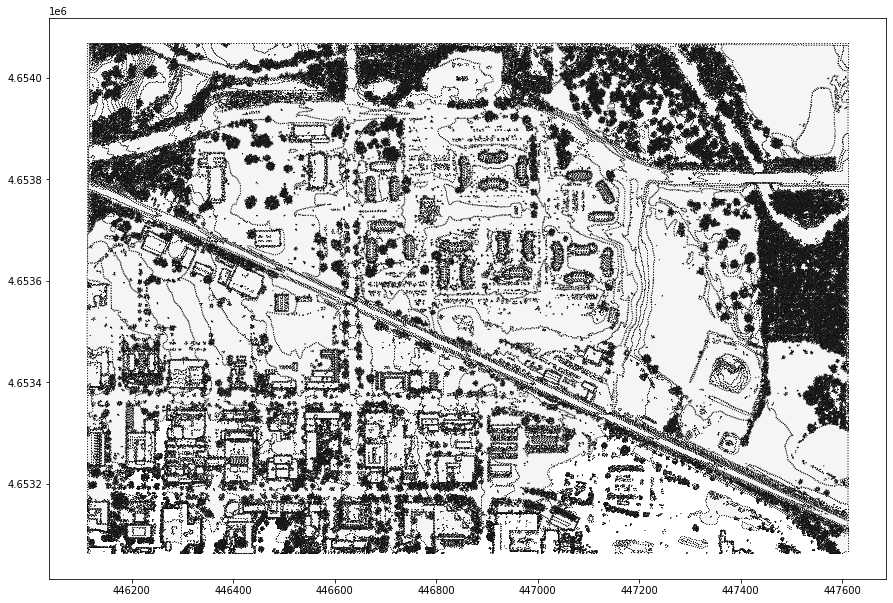

In [73]:
# Create a map
sub_iowa.plot(figsize=(15,15), color='whitesmoke', linestyle=':', edgecolor='black', aspect=1)
sub_rasters.plot(color='green', ax=ax,)


<AxesSubplot:>

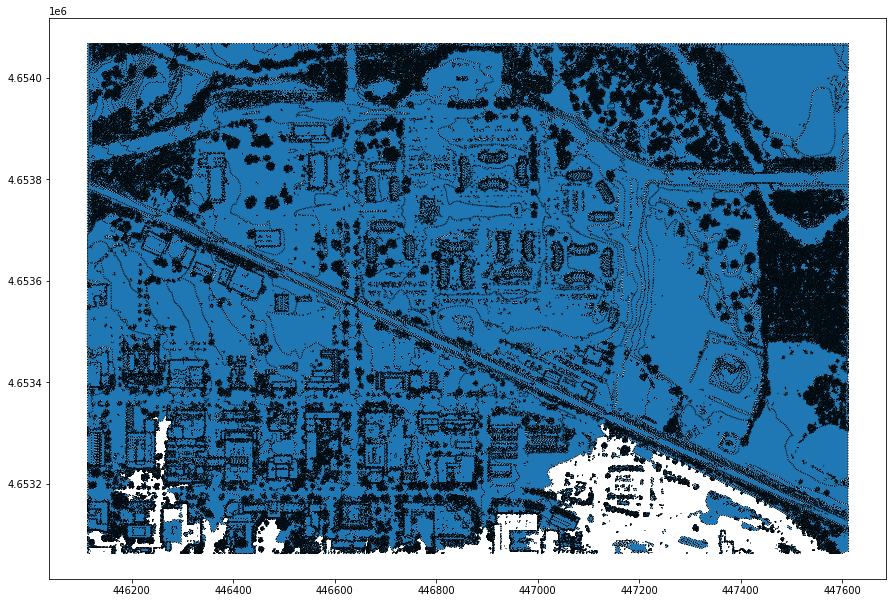

In [52]:
# Create a map
sub_iowa.plot(figsize=(15,15), color=None, linestyle=':', edgecolor='black', aspect=1)
sub_rasters.plot(color='red', ax=ax,)


### Digging Deeper

In [28]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [29]:
usa = world.loc[world['continent'].isin(['North America'])]
usa.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
16,10646714,North America,Haiti,HTI,19340.0,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."
17,10734247,North America,Dominican Rep.,DOM,161900.0,"POLYGON ((-71.70830 18.04500, -71.68774 18.316..."
19,329988,North America,Bahamas,BHS,9066.0,"MULTIPOLYGON (((-78.98000 26.79000, -78.51000 ..."


<AxesSubplot:>

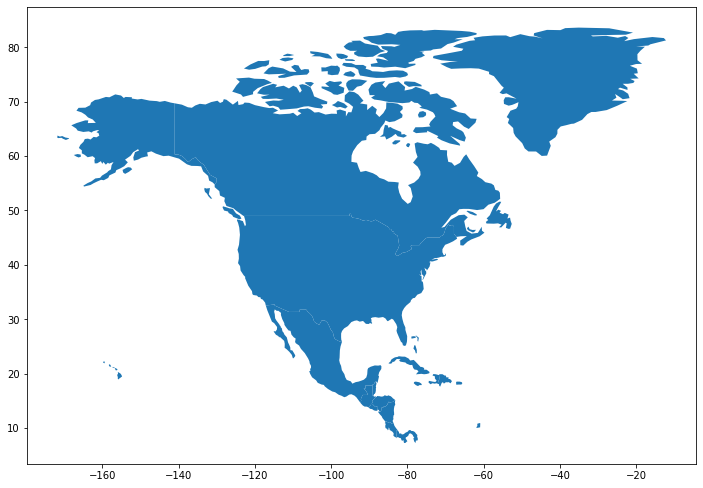

In [30]:
usa.plot(figsize=(12,12), color=None)

<AxesSubplot:>

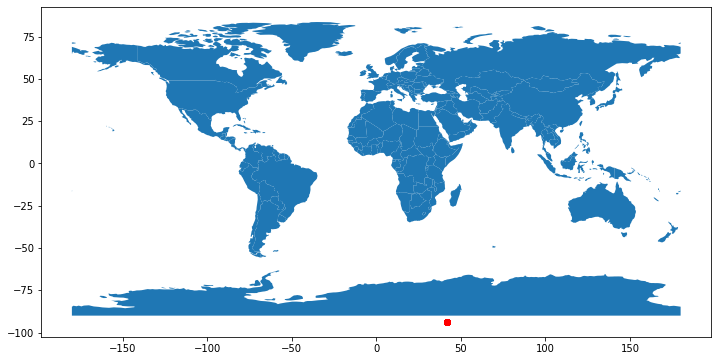

In [76]:
# Your code here
ax = world.plot(figsize=(12,12), color=None)
# sub_rasters.plot(color='red', ax=ax, aspect=1)


In [77]:
type(sub_rasters)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

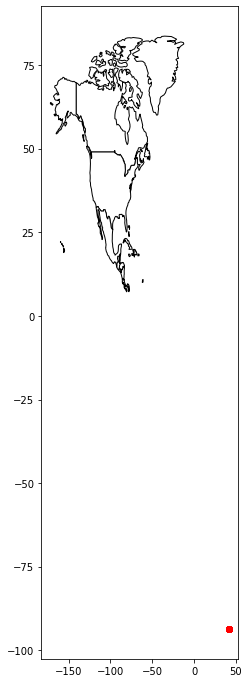

In [84]:
ax = usa.plot(figsize=(15,12), color='white', edgecolor='black', )
sub_rasters.plot(figsize=(15,12), color='red', aspect=4, ax=ax, )

In [ ]:
south_america.to_crs(epsg=3035)['geometry'].area/10**6

In [ ]:
# Plot point locations
fig, ax = plt.subplots(figsize=(12, 8))

world.plot(figsize=(10, 5), color='k',
               ax=ax)
# Add city locations
city_locations.plot(ax=ax, 
                    color='springgreen', 
                    marker='*',
                    markersize=45)

# Setup x y axes with labels and add graticules
ax.set(xlabel="Longitude (Degrees)", ylabel="Latitude (Degrees)",
       title="Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude")
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')



In [49]:
from shapely.geometry import Point, Polygon
from ipyleaflet import Map, GeoData, basemaps, LayersControl, Choropleth
from ipyleaflet import WidgetControl, GeoJSON 
from ipywidgets import Text, HTML
import geopandas
import numpy as np

# Create my own geodataframe using lats/longs to create the cells
def create_geobins(df_lat_ser, df_long_ser, n_lats, n_longs):
    polygons = []
    max_lat = df_lat_ser.max()
    min_lat = df_lat_ser.min()
    max_long = df_long_ser.max()
    min_long = df_long_ser.min()
    lat_step = abs((max_lat - min_lat)) / n_lats
    long_step = abs((max_long - min_long)) / n_longs
    for this_lat in np.arange(min_lat, max_lat, lat_step):
        for this_long in np.arange(min_long, max_long, long_step):
            polygons.append(Polygon([(this_lat, this_long),
                                     (this_lat + lat_step, this_long),
                                     (this_lat + lat_step, this_long + long_step),
                                     (this_lat, this_long + long_step),
                                     (this_lat, this_long)
                                     ]
                                    )
                            )
    return gpd.GeoDataFrame(polygons, columns=['geometry'])

# Create custom GeoDataFrame
geobins = create_geobins(sample_df.lat, sample_df.lon, 10, 6)

# Create basemap, add layer
geobins_layer = GeoData(geo_dataframe=geobins, name='cells')
m = Map(center=(42.0368103435097, -93.6509758555957), zoom=9)
m.add_layer(geobins_layer)
m.add_control(LayersControl())
m

IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException:

IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException:

IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException:

IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException:

IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException: Geometry must be a Point or LineString
IllegalArgumentException:

Map(center=[42.0368103435097, -93.6509758555957], controls=(ZoomControl(options=['position', 'zoom_in_text', '…

In [13]:
math.tan(1.55) * 5

240.39241239609535

## TWI
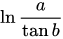

local slope in radians is b

In [3]:
help(tif_shp)

Help on function tif_shp in module tif_to_shp:

tif_shp(shp_filename: str, tif_filename: str) -> None



reading tif file...
creating shapefile...


In [10]:
print(iowa.shape)
print(type(iowa))
iowa.head()

(515892, 2)
<class 'geopandas.geodataframe.GeoDataFrame'>


,elevation,geometry
0,282.0,"POLYGON ((-10425171.940 5166495.710, -10425170..."
1,284.0,"POLYGON ((-10425170.940 5166495.710, -10425166..."
2,280.0,"POLYGON ((-10425166.940 5166495.710, -10425164..."
3,279.0,"POLYGON ((-10425164.940 5166495.710, -10425162..."
4,279.0,"POLYGON ((-10425161.940 5166495.710, -10425159..."


In [14]:

iowa.head()

,elevation,geometry,centroid,area
0,282.0,"POLYGON ((-10425171.940 5166495.710, -10425170...",POINT (-10425171.440 5166495.210),1.0
1,284.0,"POLYGON ((-10425170.940 5166495.710, -10425166...",POINT (-10425168.940 5166495.210),4.0
2,280.0,"POLYGON ((-10425166.940 5166495.710, -10425164...",POINT (-10425165.940 5166495.210),2.0
3,279.0,"POLYGON ((-10425164.940 5166495.710, -10425162...",POINT (-10425163.940 5166495.210),2.0
4,279.0,"POLYGON ((-10425161.940 5166495.710, -10425159...",POINT (-10425161.107 5166494.877),3.0


In [26]:
# compute slope
import numpy as np
import geopandas as gpd
from tif_to_shp import tif_shp

def get_point_elevation_twi(tif_filename, resolution=5):
    tif_shp(shp_filename='shp/IA_FullState.shp', tif_filename=tif_filename)
    df = gpd.read_file('shp/IA_FullState.shp')
    
    # get area
    df['area'] = iowa.set_crs(epsg=3857)['geometry'].area
    df['geometry'] = df['geometry'].centroid
    df['slope'] = np.arctan(df['elevation']/resolution)
    df['twi'] = np.log(df['area'] / df['slope'])
    
    df.to_csv('point_elevation_twi.csv', index=False)
    
    return df

In [27]:
my_df = get_point_elevation_twi(tif_filename='IA_FullState.tif')

my_df.head(10)

reading tif file...
creating shapefile...


/home/Abuton/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,elevation,geometry,area,slope,twi
0,282.0,POINT (-10425171.440 5166495.210),1.0,1.553068,-0.440232
1,284.0,POINT (-10425168.940 5166495.210),4.0,1.553193,0.945982
2,280.0,POINT (-10425165.940 5166495.210),2.0,1.552941,0.252997
3,279.0,POINT (-10425163.940 5166495.210),2.0,1.552877,0.253038
4,279.0,POINT (-10425161.107 5166494.877),3.0,1.552877,0.658503
5,278.0,POINT (-10425159.040 5166494.410),5.0,1.552813,1.169370
6,279.0,POINT (-10425157.440 5166495.210),1.0,1.552877,-0.440109
7,278.0,POINT (-10425155.940 5166495.210),2.0,1.552813,0.253079
8,277.0,POINT (-10425153.940 5166495.210),2.0,1.552748,0.253121
9,276.0,POINT (-10425145.190 5166493.960),4.0,1.552682,0.946310


In [1]:
import fiona
import numpy as np
from osgeo import osr
from osgeo import ogr
from osgeo import gdal

In [2]:
# open point shapefile
gwShp = fiona.open('../shp/IA_FullState.shp')

# get spatial bounds
gwBounds = gwShp.bounds
gwBounds

(-10425171.94, 5164494.71, -10423170.94, 5166495.71)

In [3]:
# review attribute table for first row
gwShp[0]

{'type': 'Feature',
 'id': '0',
 'properties': OrderedDict([('elevation', 282.0)]),
 'geometry': {'type': 'Polygon',
  'coordinates': [[(-10425171.94, 5166495.71),
    (-10425170.94, 5166495.71),
    (-10425170.94, 5166494.71),
    (-10425171.94, 5166494.71),
    (-10425171.94, 5166495.71)]]}}

In [7]:
import geopandas as gpd
df = gpd.read_file('../shp/IA_FullState.shp')

In [17]:
# create geospatial raster  
rasterDs = gdal.Grid('../IA_FullState.tif', '../shp/IA_FullState.shp', format='GTiff',
               algorithm='invdist', zfield='elevation')
rasterDs.FlushCache()

In [18]:
# get raster system of reference
proj = osr.SpatialReference(wkt=rasterDs.GetProjection())
proj.ExportToWkt()

''

In [19]:
# get raster band
rasterBand = rasterDs.GetRasterBand(1)

# get elevation as numpy array
elevArray = rasterBand.ReadAsArray()
print(elevArray[:4,:4])

[[309.         301.         298.         295.75357056]
 [298.         293.         293.         301.        ]
 [293.         292.         293.         295.09436035]
 [291.91946411 291.38586426 297.16259766 296.58810425]]


In [20]:
# define not a number
demNan = -9999

# get dem max and min
demMax = elevArray.max()
demMin = elevArray[elevArray!=demNan].min()
print("Maximun dem elevation: %.2f, minimum dem elevation: %.2f"%(demMax,demMin))


# define output shapefile
contourPath = '../shp/IA_FullState_Coutours.shp'
contourDs = ogr.GetDriverByName("ESRI Shapefile").CreateDataSource(contourPath)

Maximun dem elevation: 327.00, minimum dem elevation: -2818.05


In [21]:
# define layer name and coordinate system
contourShp = contourDs.CreateLayer('contour', proj)

# define fields of id and elev
fieldDef = ogr.FieldDefn("ID", ogr.OFTInteger)
contourShp.CreateField(fieldDef)
fieldDef = ogr.FieldDefn("elev", ogr.OFTReal)
contourShp.CreateField(fieldDef)

0

In [22]:
#define number of contours and range
conNum = 10
conList =[int(x) for x in np.linspace(demMin,demMax,conNum)]

# write shapefile using noDataValue
#ContourGenerate(Band srcBand, double contourInterval, double contourBase, int fixedLevelCount, int useNoData, double noDataValue, 
#                Layer dstLayer, int idField, int elevField
gdal.ContourGenerate(rasterBand, 0, 0, conList, 1, -32768., 
                     contourShp, 0, 1)

contourDs.Destroy()